# **House Prices - Advanced Regression Techniques**

### **Predict sales prices and practice feature engineering, RFs, and gradient boosting**

Kaggle Challenge

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the .csv file using pandas**

In [2]:
df = pd.read_csv('/Users/glenquadros/Desktop/Machine Learning/Projects/House Price Predictions/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df = df.drop(df[['Alley', 'PoolQC', 'Fence', 'MiscFeature']], axis=1)

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


**Here, we are checking for and sort of missing data and removing outliers. We drop the rows that we consider to be outliers. I use Seaborn plots to find the outliers**

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

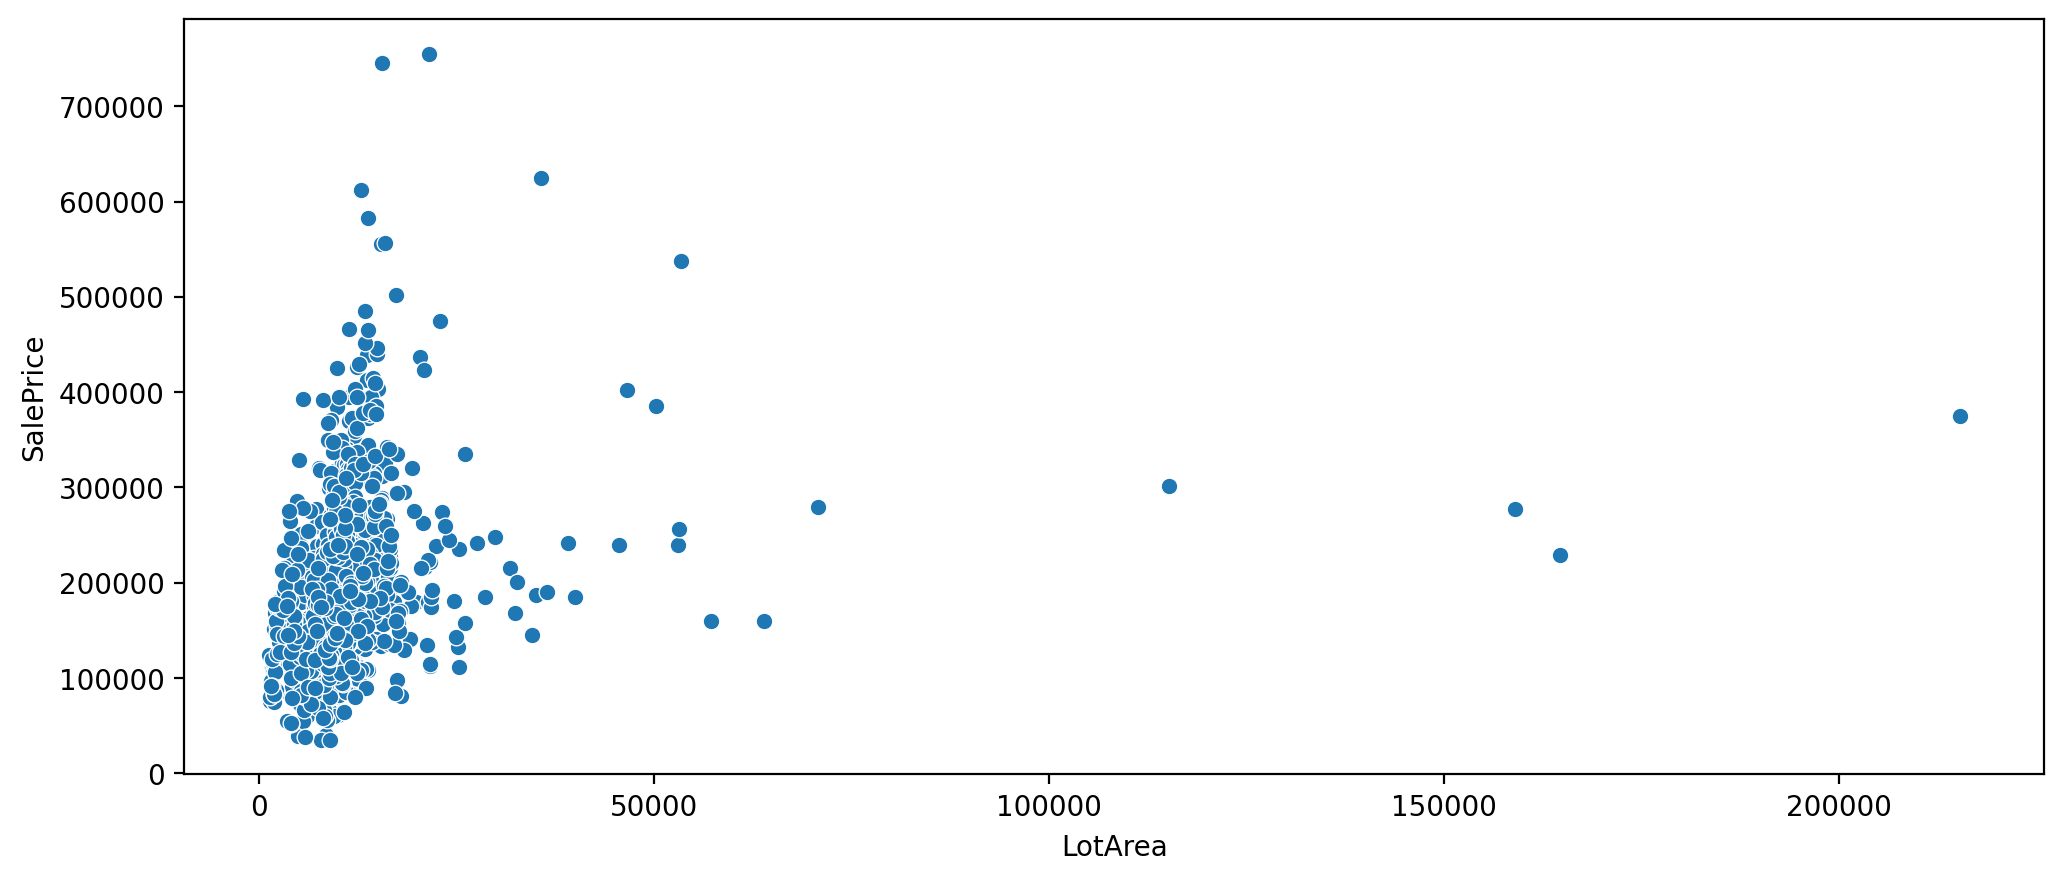

In [7]:
plt.figure(figsize=(12,5), dpi=200)
sns.scatterplot(data=df, x='LotArea', y='SalePrice')

<AxesSubplot:>

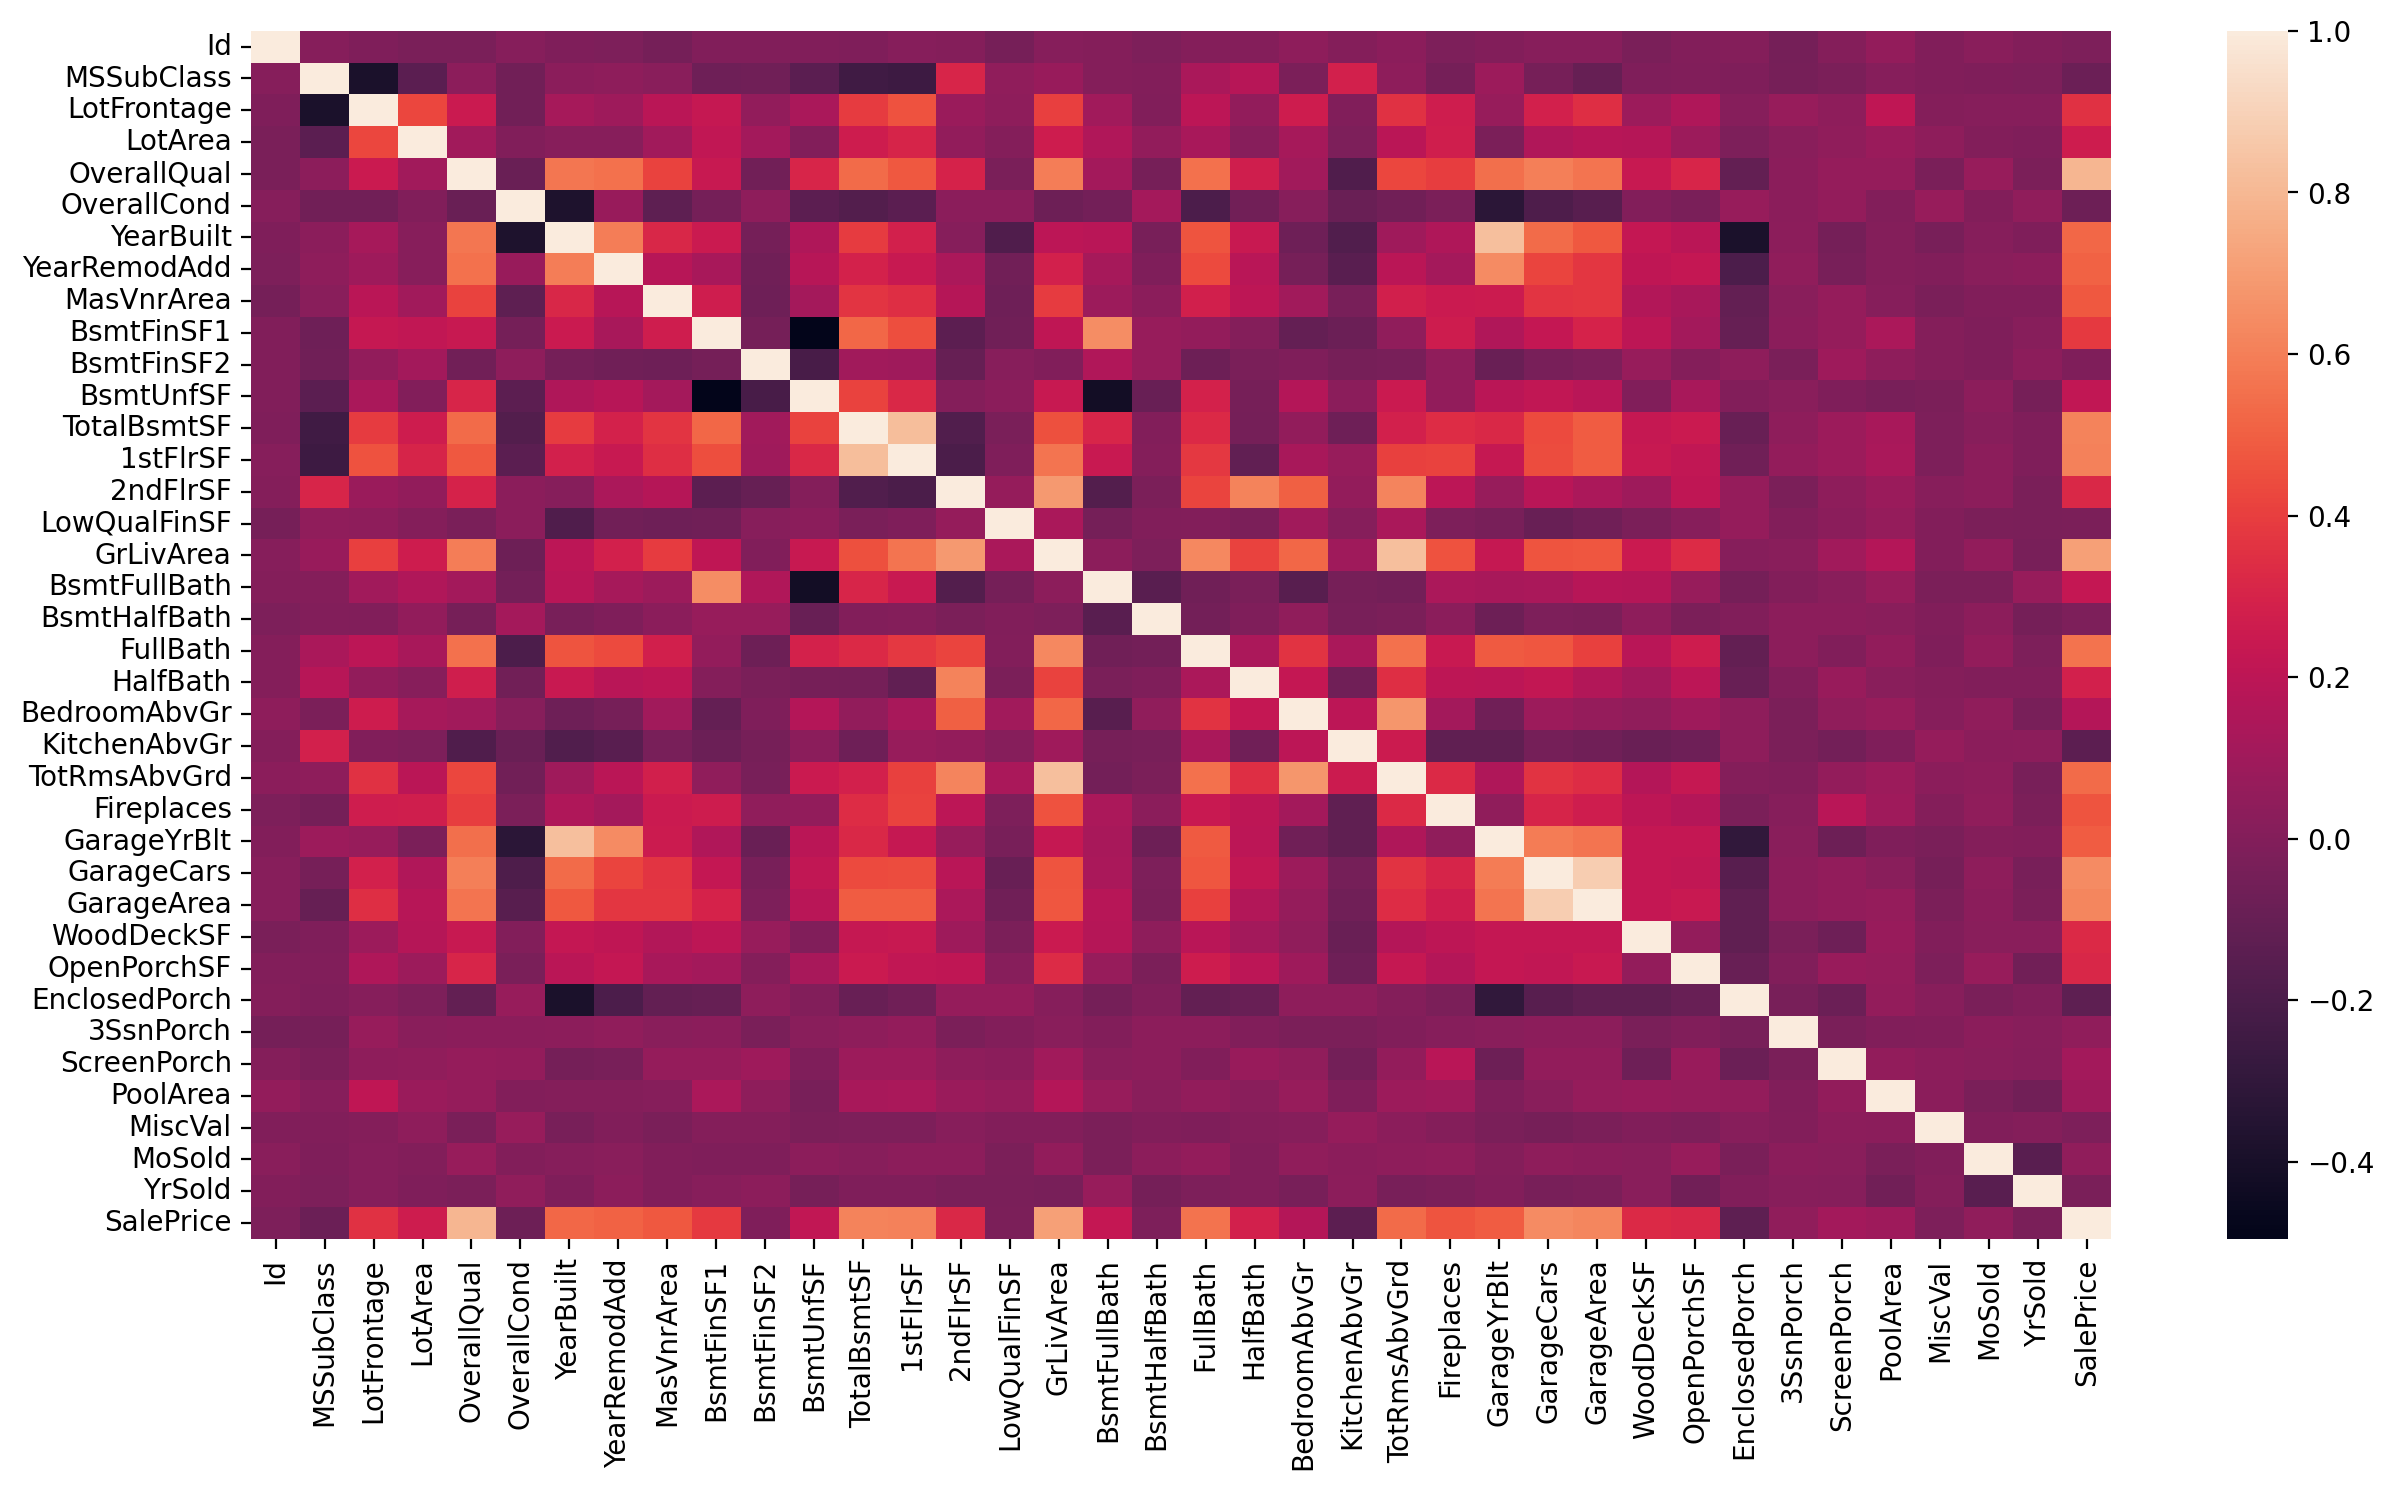

In [8]:
plt.figure(figsize=(15,8), dpi=200)
sns.heatmap(df.corr())

In [9]:
df.corr()['SalePrice'][:-1].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

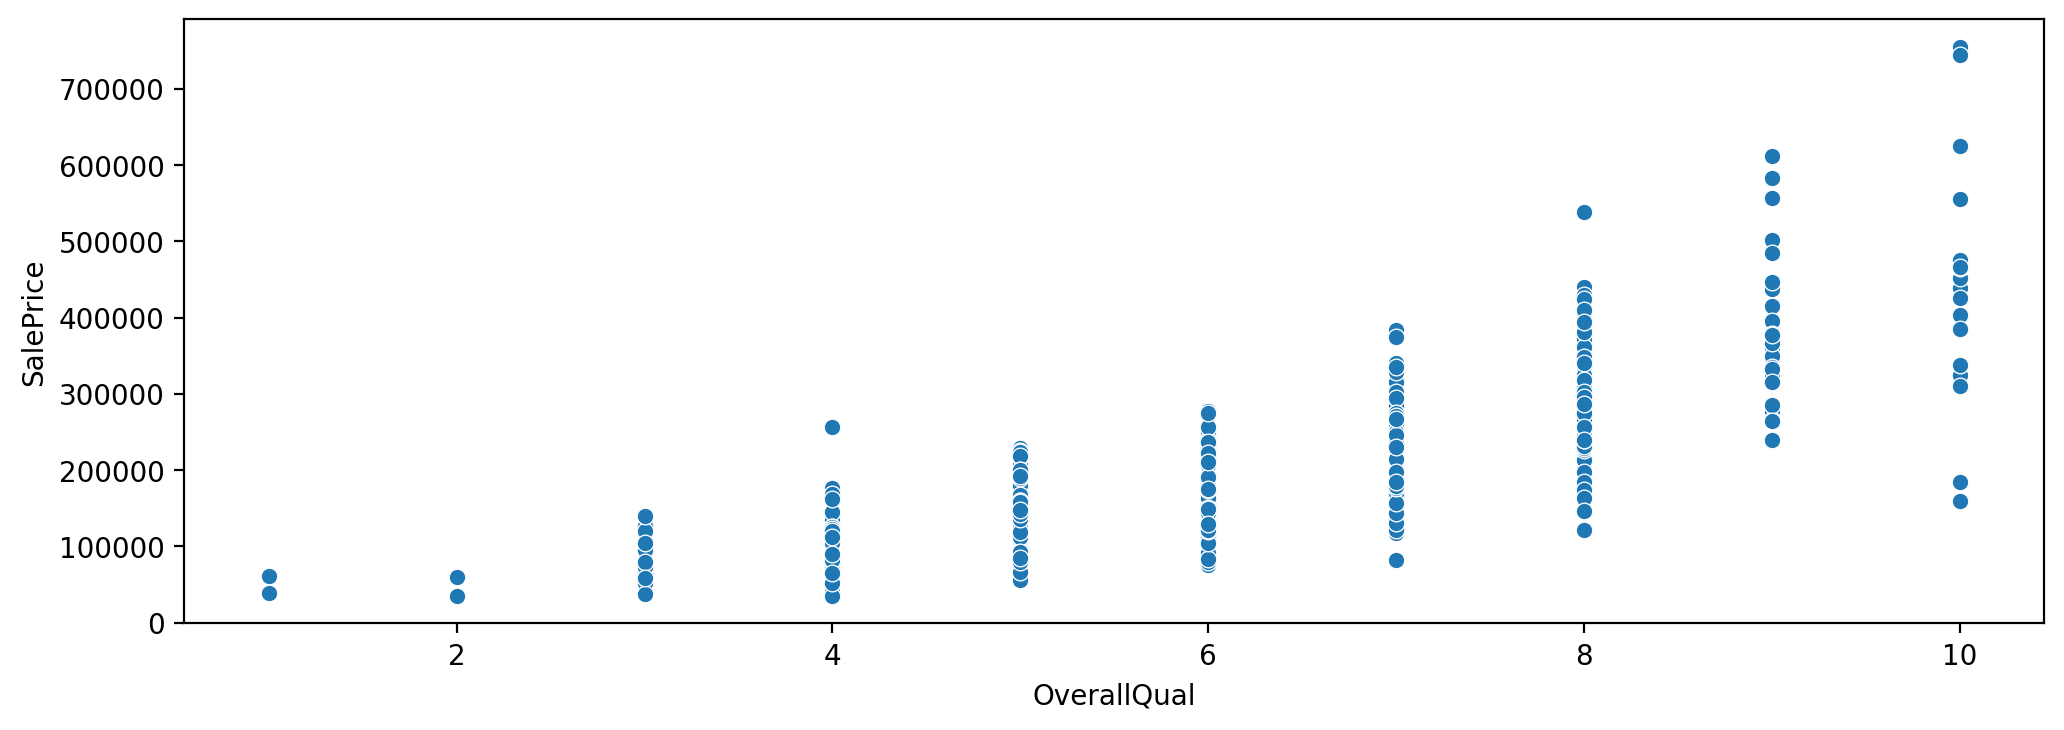

In [10]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

In [11]:
df[(df['OverallQual'] > 8) & (df['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [12]:
df = df.drop([523, 1298])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

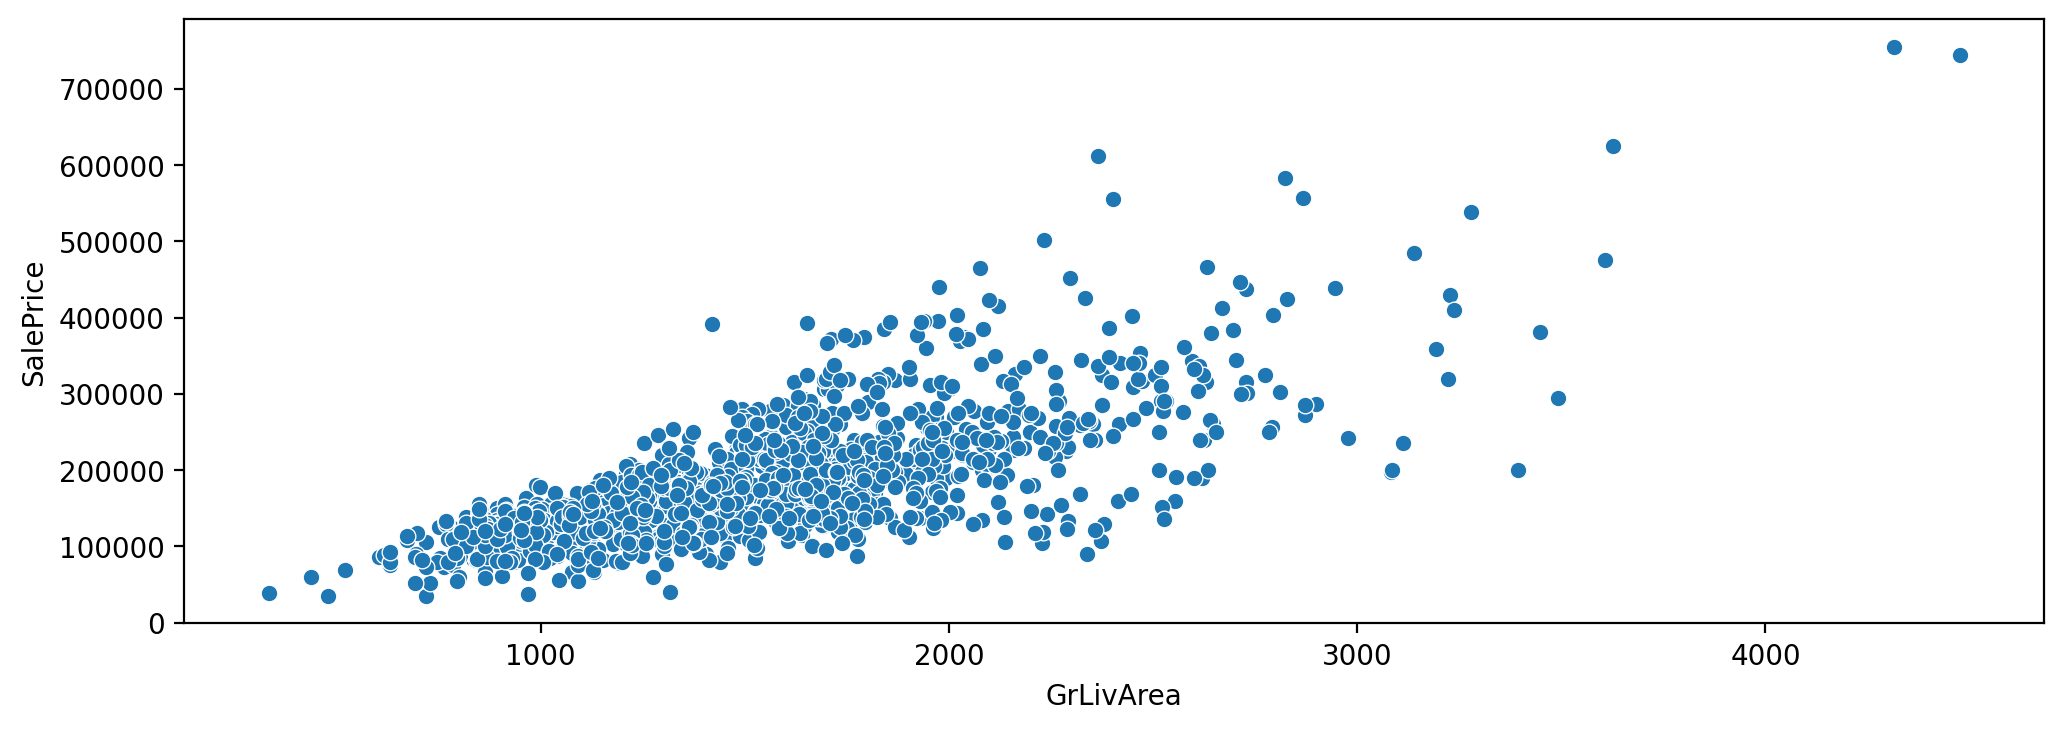

In [13]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

In [14]:
df[(df['GrLivArea'] < 1500) & (df['SalePrice'] > 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
688,689,20,RL,60.0,8089,Pave,Reg,HLS,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,392000


In [15]:
df = df.drop(688)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

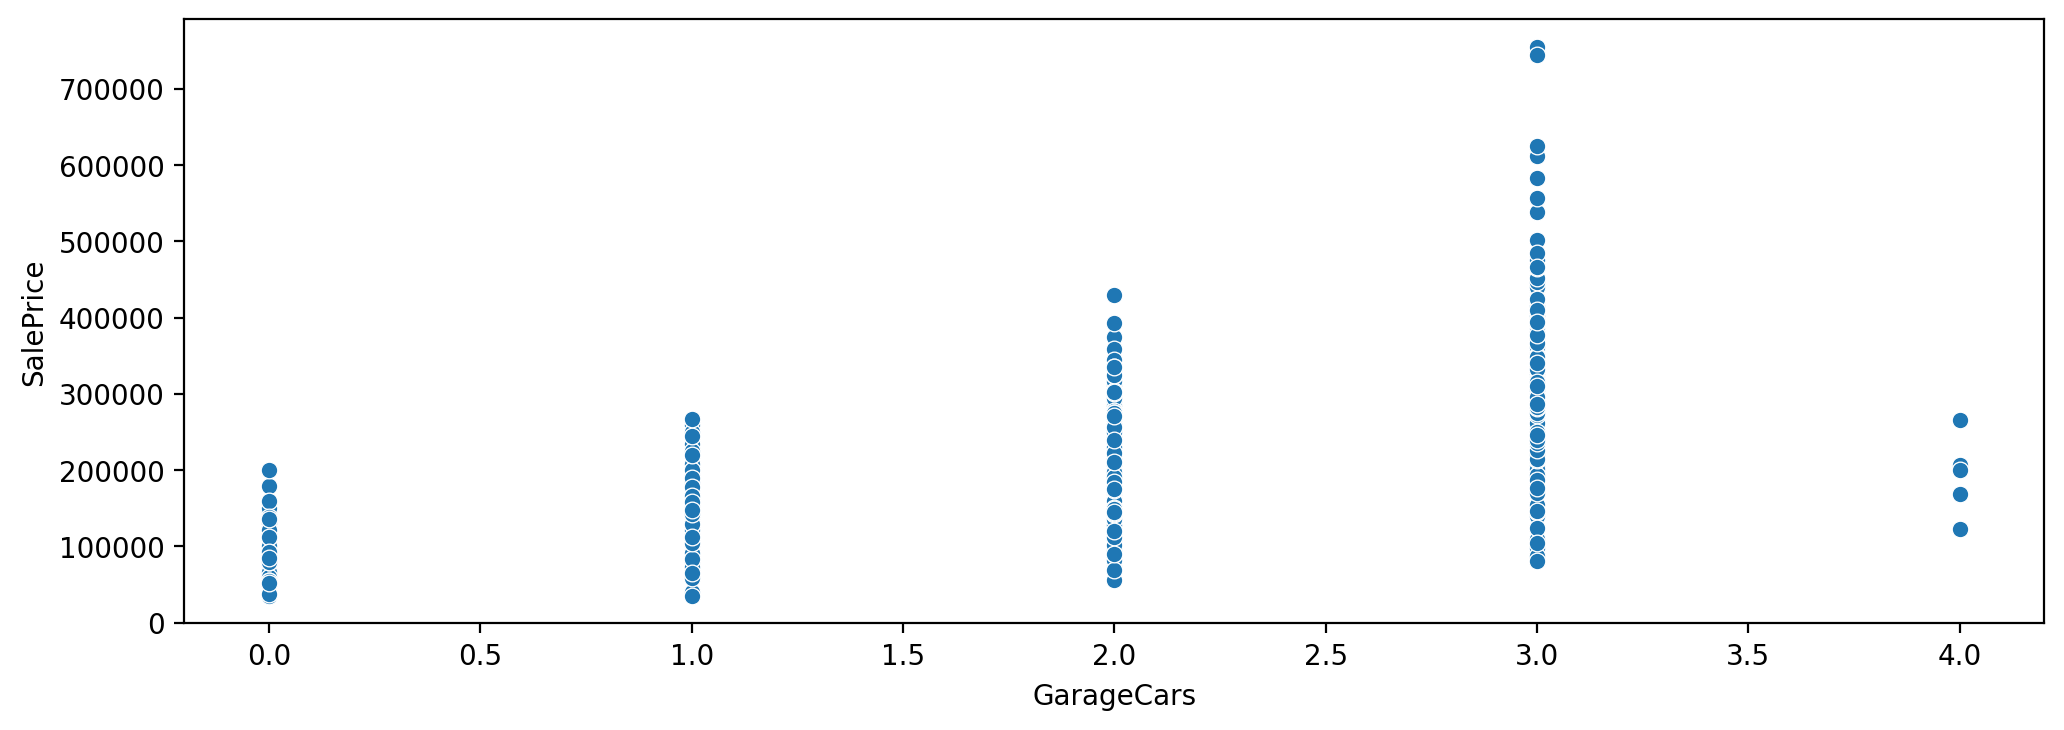

In [16]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)

In [17]:
df[(df['GarageCars'] == 3) & (df['SalePrice'] > 650000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [18]:
df = df.drop([691, 1182])

In [19]:
df.isna().sum().sort_values()

Id                 0
TotalBsmtSF        0
SaleCondition      0
HeatingQC          0
CentralAir         0
                ... 
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Length: 77, dtype: int64

In [20]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1455, dtype: object

In [21]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [22]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1455, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

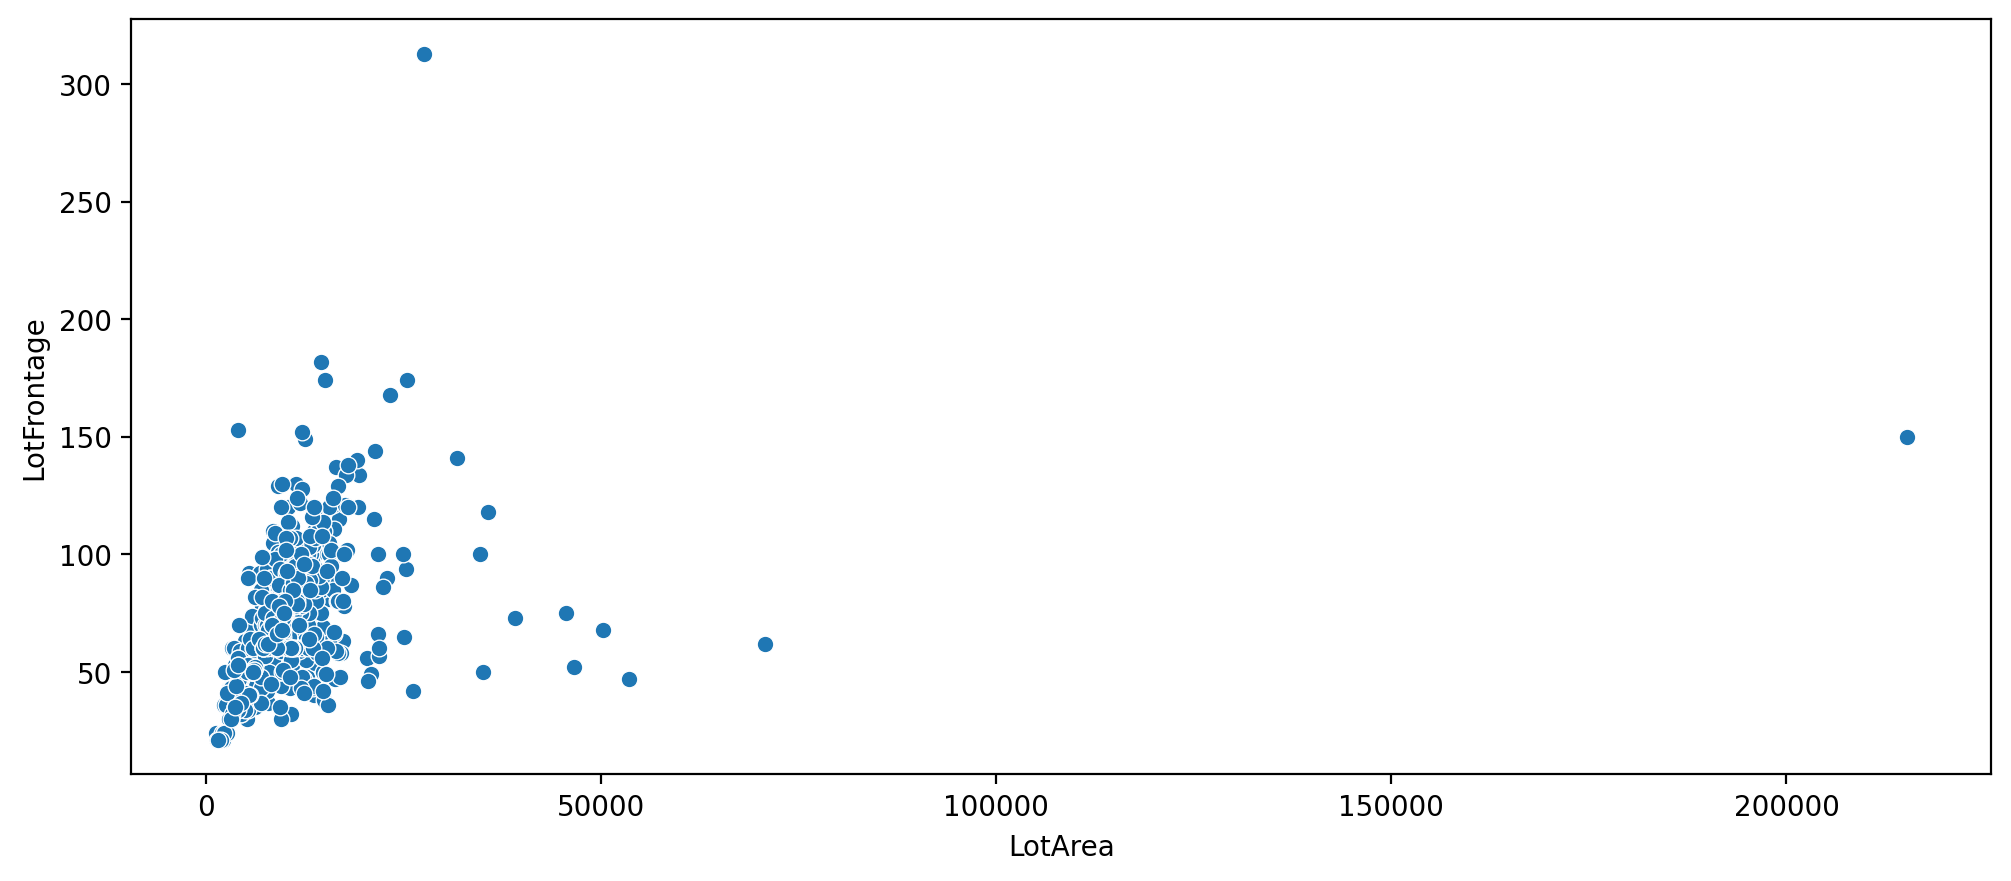

In [23]:
plt.figure(figsize=(12,5), dpi=200)
sns.scatterplot(data=df, y='LotFrontage', x='LotArea')

In [24]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [25]:
df.isna().sum().sort_values()

Id               0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
                ..
GarageQual      81
GarageCond      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
Length: 77, dtype: int64

In [26]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1455, dtype: object

In [27]:
df['GarageType'] = df['GarageType'].fillna('NA')

In [28]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1455, dtype: float64

In [29]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearRemodAdd'])

In [30]:
df.isna().sum().sort_values()

Id               0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
                ..
BsmtExposure    38
BsmtFinType2    38
GarageQual      81
GarageCond      81
GarageFinish    81
Length: 77, dtype: int64

In [31]:
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')

In [32]:
df.isna().sum().sort_values()

Id               0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
                ..
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
BsmtExposure    38
BsmtFinType2    38
Length: 77, dtype: int64

In [33]:
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

In [34]:
df.isna().sum().sort_values()

Id              0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
               ..
Foundation      0
SalePrice       0
Electrical      1
MasVnrArea      8
MasVnrType      8
Length: 77, dtype: int64

In [35]:
df['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1455, dtype: float64

In [36]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

In [37]:
df['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1455, dtype: object

In [38]:
df['MasVnrType'] = df['MasVnrType'].fillna('NA')

In [39]:
df.isna().sum().sort_values()

Id              0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
               ..
Exterior1st     0
RoofMatl        0
Foundation      0
SalePrice       0
Electrical      1
Length: 77, dtype: int64

In [40]:
df['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1455, dtype: object

In [41]:
df['Electrical'].value_counts()

SBrkr    1329
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [43]:
df.isna().sum().sort_values()

Id              0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 77, dtype: int64

**Reading the test .csv file with the help of pandas**

In [44]:
test = pd.read_csv('/Users/glenquadros/Desktop/Machine Learning/Projects/House Price Predictions/house-prices-advanced-regression-techniques/test.csv')

In [45]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
test = test.drop(test[['Alley', 'PoolQC', 'Fence', 'MiscFeature']], axis=1)

In [48]:
train = df.drop('Id', axis=1)
test = test.drop('Id', axis=1)

**Splitting into X_train, y_train and X_test**

In [49]:
X_train = df.drop('SalePrice', axis=1)
y_train = df['SalePrice']

In [50]:
X_test = test

In [51]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [52]:
X_train.shape[1]

286

In [53]:
X_test.shape[1]

259

**Since the shape of X_train does not match the shape of X_test, we create a new variable X_train_encoding which saves X_train columns as a list and then align X_train_encoding with X_test and fill the remaining values with 0**

In [54]:
X_train_encoding = X_train.columns.tolist()
X_test = X_test.reindex(columns=X_train_encoding).fillna(0)

**We use GradientBoostingRegressor Model and then use GridSearchCV for finding the best parameters**

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
model = GradientBoostingRegressor()

In [57]:
n_estimators = [100, 200, 500, 1000, 1500, 2000]
max_depth = [2, 3, 4, 5, 6, 7, 8]
learning_rate = [0.02, 0.05, 0.1, 0.2]

In [58]:
param_grid = {'n_estimators' : n_estimators,
             'max_depth': max_depth,
             'learning_rate': learning_rate
             }

In [60]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

In [61]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 500, 1000, 1500, 2000]},
             scoring='neg_root_mean_squared_error')

In [62]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 1500}

In [63]:
grid.best_score_

-22166.243685956528

**Once we are happy with the parameters, we create a final model using the new parameters**

In [66]:
final_model = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 2, n_estimators = 1500)

In [67]:
final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=1500)

**Making predictions based on the X_test, and then creating a DataFrame to save the results**

In [68]:
preds = final_model.predict(X_test)

In [69]:
df_test = pd.read_csv('/Users/glenquadros/Desktop/Machine Learning/Projects/House Price Predictions/house-prices-advanced-regression-techniques/test.csv')

In [70]:
preds = pd.DataFrame({'Id' : df_test['Id'], 'SalePrice' : preds})

In [71]:
preds

,Id,SalePrice
0,1461,127057.094681
1,1462,168269.170693
2,1463,188430.715161
3,1464,190125.351332
4,1465,197423.435367
...,...,...
1454,2915,86833.391696
1455,2916,80163.276260
1456,2917,153732.874991
1457,2918,125046.667585


**Saving the predictions DataFrame to a .csv file**

In [72]:
final_result = preds.to_csv("submission_gb.csv", index=False)